In [43]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'sunspot.csv'
df = pd.read_csv(file_path)
df.head()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1


In [44]:
df.isnull().sum()

Year                        0
Month                       0
Day                         0
Date In Fraction Of Year    0
Number of Sunspots          0
Standard Deviation          0
Observations                0
Indicator                   0
dtype: int64

In [45]:
# Convert Year, Month, and Day to Date column
df['Date'] = pd.to_datetime(
    dict(year=df['Year'], month=df['Month'], day=df['Day'])
)

# Set the Date column as index
df = df.reset_index(drop=True)

# Display the first few rows of the dataframe
df.head()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator,Date
0,1818,1,1,1818.001,-1,-1.0,0,1,1818-01-01
1,1818,1,2,1818.004,-1,-1.0,0,1,1818-01-02
2,1818,1,3,1818.007,-1,-1.0,0,1,1818-01-03
3,1818,1,4,1818.010,-1,-1.0,0,1,1818-01-04
4,1818,1,5,1818.012,-1,-1.0,0,1,1818-01-05


In [46]:
df.tail()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator,Date
75660,2025,2,24,2025.149,164,16.0,20,0,2025-02-24
75661,2025,2,25,2025.152,166,22.5,18,0,2025-02-25
75662,2025,2,26,2025.155,124,18.6,21,0,2025-02-26
75663,2025,2,27,2025.158,130,20.8,26,0,2025-02-27
75664,2025,2,28,2025.160,117,20.0,29,0,2025-02-28


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75665 entries, 0 to 75664
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      75665 non-null  int64         
 1   Month                     75665 non-null  int64         
 2   Day                       75665 non-null  int64         
 3   Date In Fraction Of Year  75665 non-null  float64       
 4   Number of Sunspots        75665 non-null  int64         
 5   Standard Deviation        75665 non-null  float64       
 6   Observations              75665 non-null  int64         
 7   Indicator                 75665 non-null  int64         
 8   Date                      75665 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 5.2 MB


# **Data Visualisation**
Plot the raw time series data to understand trends and seasonality, using libraries such as matplotlib or seaborn.

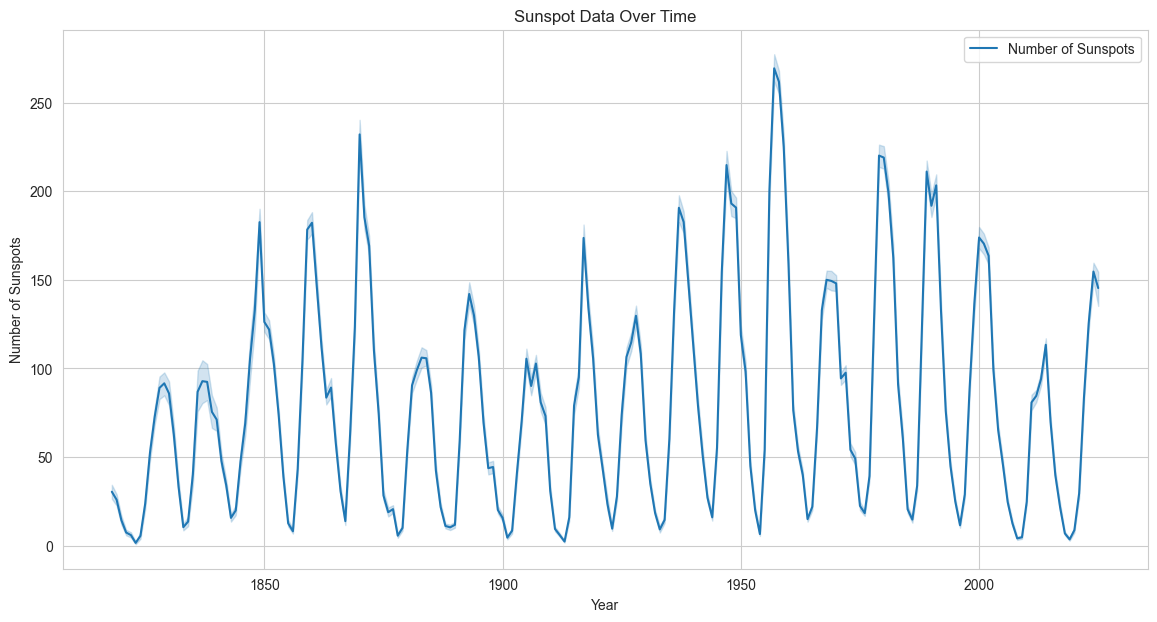

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the raw time series data using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Number of Sunspots', data=df, label='Number of Sunspots')
plt.title('Sunspot Data Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Dense, LSTM  # type: ignore

# Select the 'Number of Sunspots' column
data = df[['Number of Sunspots']].values

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [50]:
# Split the dataset based on Date column
train_data = df[(df['Date'] >= pd.Timestamp('1818-01-01')) & (df['Date'] < pd.Timestamp('2016-01-01'))].copy()
test_data = df[(df['Date'] >= pd.Timestamp('2016-01-01')) & (df['Date'] <= pd.Timestamp('2025-12-31'))].copy()

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (72318, 9)
Test data shape: (3347, 9)


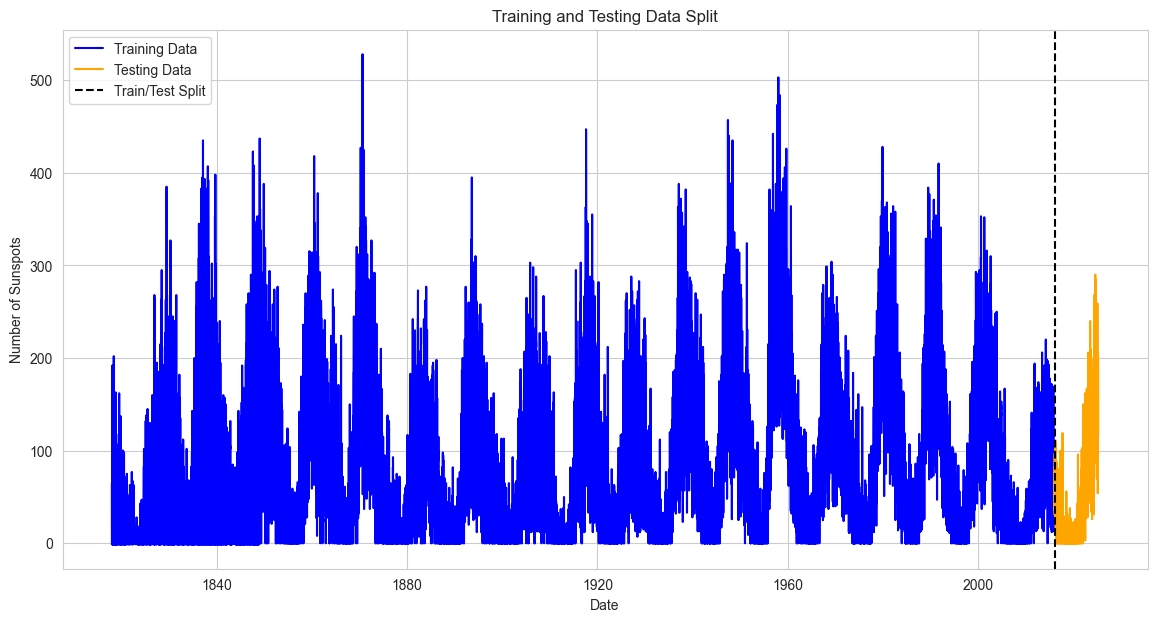

In [51]:
# Plotting the training and testing data

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(train_data['Date'], train_data['Number of Sunspots'], label='Training Data', color='blue')
ax.plot(test_data['Date'], test_data['Number of Sunspots'], label='Testing Data', color='orange')
ax.axvline(x=pd.Timestamp('2016-01-01'), color='black', linestyle='--', label='Train/Test Split')
ax.set_title('Training and Testing Data Split')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Sunspots')
ax.legend()
plt.show()

In [52]:
# Create hour, dayofweek, month, dayofyear and year features
def create_features(df):
    df = df.copy()
    df['Hour'] = df['Date'].dt.hour
    df['Dayofweek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    df['Dayofyear'] = df['Date'].dt.dayofyear
    return df

df = create_features(df)

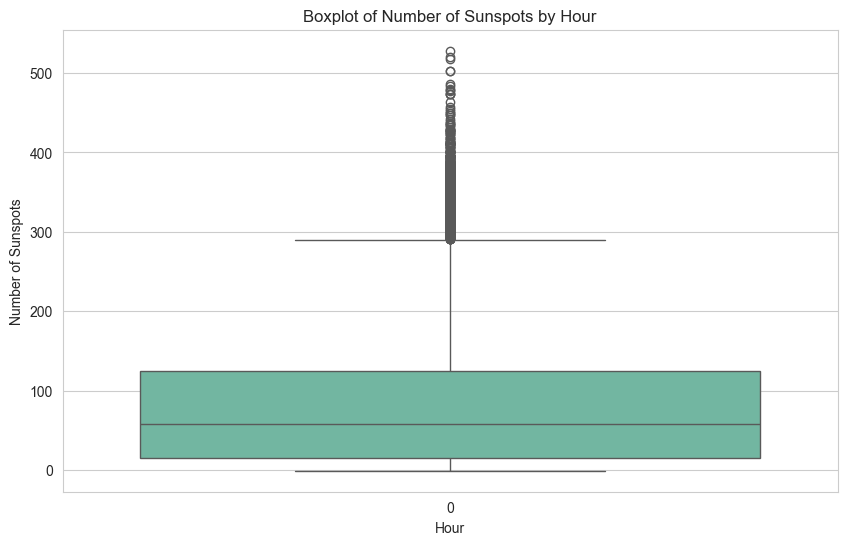

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Hour', y='Number of Sunspots', data=df, hue='Hour', palette='Set2', dodge=False, legend=False)
ax.set_title('Boxplot of Number of Sunspots by Hour')
plt.show()

In [54]:
df.head()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator,Date,Hour,Dayofweek,Dayofyear
0,1818,1,1,1818.001,-1,-1.0,0,1,1818-01-01,0,3,1
1,1818,1,2,1818.004,-1,-1.0,0,1,1818-01-02,0,4,2
2,1818,1,3,1818.007,-1,-1.0,0,1,1818-01-03,0,5,3
3,1818,1,4,1818.010,-1,-1.0,0,1,1818-01-04,0,6,4
4,1818,1,5,1818.012,-1,-1.0,0,1,1818-01-05,0,0,5


In [55]:
# import XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_data = create_features(train_data)
test_data = create_features(test_data)

In [56]:
train_data

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator,Date,Hour,Dayofweek,Dayofyear
0,1818,1,1,1818.001,-1,-1.0,0,1,1818-01-01,0,3,1
1,1818,1,2,1818.004,-1,-1.0,0,1,1818-01-02,0,4,2
2,1818,1,3,1818.007,-1,-1.0,0,1,1818-01-03,0,5,3
3,1818,1,4,1818.010,-1,-1.0,0,1,1818-01-04,0,6,4
4,1818,1,5,1818.012,-1,-1.0,0,1,1818-01-05,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
72313,2015,12,27,2015.988,67,4.5,28,1,2015-12-27,0,6,361
72314,2015,12,28,2015.990,71,7.0,34,1,2015-12-28,0,0,362
72315,2015,12,29,2015.993,57,3.4,15,1,2015-12-29,0,1,363
72316,2015,12,30,2015.996,37,2.7,16,1,2015-12-30,0,2,364


In [57]:
test_data

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator,Date,Hour,Dayofweek,Dayofyear
72318,2016,1,1,2016.001,37,2.5,6,1,2016-01-01,0,4,1
72319,2016,1,2,2016.004,40,3.7,17,1,2016-01-02,0,5,2
72320,2016,1,3,2016.007,51,4.6,7,1,2016-01-03,0,6,3
72321,2016,1,4,2016.010,70,5.8,12,1,2016-01-04,0,0,4
72322,2016,1,5,2016.012,35,3.1,14,1,2016-01-05,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
75660,2025,2,24,2025.149,164,16.0,20,0,2025-02-24,0,0,55
75661,2025,2,25,2025.152,166,22.5,18,0,2025-02-25,0,1,56
75662,2025,2,26,2025.155,124,18.6,21,0,2025-02-26,0,2,57
75663,2025,2,27,2025.158,130,20.8,26,0,2025-02-27,0,3,58


In [58]:
FEATURES = ['Year', 'Day', 'Hour', 'Dayofweek', 'Month', 'Dayofyear']
TARGET = 'Number of Sunspots'

X_train = train_data[FEATURES]
y_train = train_data[TARGET]

X_test = test_data[FEATURES]
y_test = test_data[TARGET]

look_back = 365 * 2

# Define a function to create sequences of data
def create_sequences(X, y, look_back=30):
    X_seq, y_seq = [], []
    for i in range(len(X) - look_back):
        X_seq.append(X[i:(i+look_back)])
        y_seq.append(y[i+look_back])
    return np.array(X_seq), np.array(y_seq)

X_train, y_train = create_sequences(X_train.values, y_train.values, look_back=look_back)
X_test, y_test = create_sequences(X_test.values, y_test.values, look_back=look_back)

In [59]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (57270, 730, 6)
X_val shape: (14318, 730, 6)
y_train shape: (57270,)
y_val shape: (14318,)


In [62]:
# Create the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, 
                         early_stopping_rounds=50, 
                         learning_rate=0.01, max_depth=5, 
                         subsample=0.9, colsample_bytree=0.9)

# Reshape the data from 3D to 2D
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_train, y_train),
                                      (X_val, y_val)],
          verbose=True)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

[0]	validation_0-rmse:77.69360	validation_1-rmse:77.17452
[1]	validation_0-rmse:77.44245	validation_1-rmse:76.93465
[2]	validation_0-rmse:77.21381	validation_1-rmse:76.71537
[3]	validation_0-rmse:76.97090	validation_1-rmse:76.48376
[4]	validation_0-rmse:76.75026	validation_1-rmse:76.27171
[5]	validation_0-rmse:76.53265	validation_1-rmse:76.06313
[6]	validation_0-rmse:76.31845	validation_1-rmse:75.85797
[7]	validation_0-rmse:76.08950	validation_1-rmse:75.63935
[8]	validation_0-rmse:75.88238	validation_1-rmse:75.44088
[9]	validation_0-rmse:75.67848	validation_1-rmse:75.24570
[10]	validation_0-rmse:75.51261	validation_1-rmse:75.08679
[11]	validation_0-rmse:75.29505	validation_1-rmse:74.87964
[12]	validation_0-rmse:75.09968	validation_1-rmse:74.69237
[13]	validation_0-rmse:74.94058	validation_1-rmse:74.53960
[14]	validation_0-rmse:74.75067	validation_1-rmse:74.35784
[15]	validation_0-rmse:74.59557	validation_1-rmse:74.20934
[16]	validation_0-rmse:74.41211	validation_1-rmse:74.03368
[17]	va

KeyboardInterrupt: 

In [17]:
from tensorflow.keras.layers import Input # type: ignore

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(look_back, 1)))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:


# Train the model
history = model.fit(X_train, y_train, epochs=10, 
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0060 - val_loss: 0.0010
Epoch 2/10
 980/1891 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0039

KeyboardInterrupt: 

In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Inverse-transform actual values for comparison
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

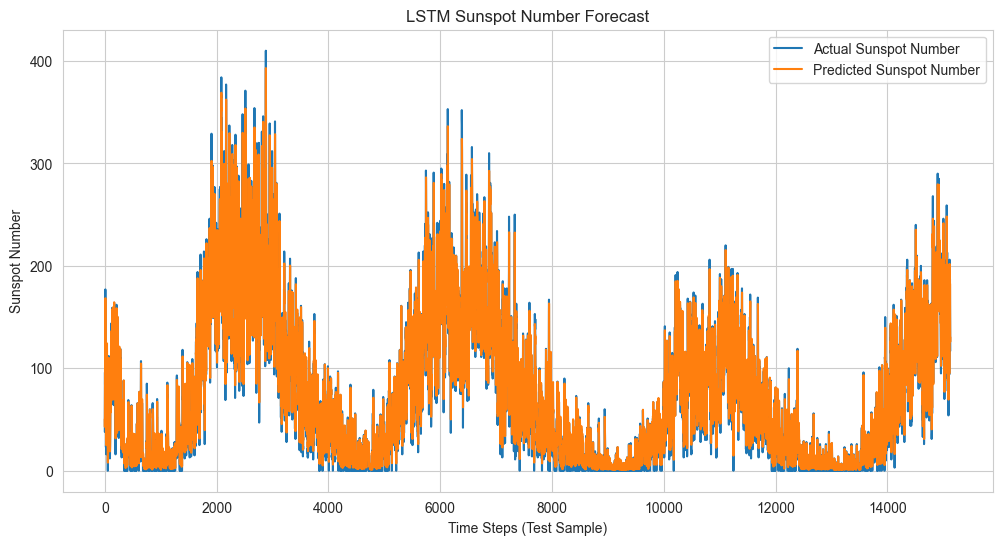

In [ ]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual Sunspot Number')
plt.plot(predictions, label='Predicted Sunspot Number')
plt.title('LSTM Sunspot Number Forecast')
plt.xlabel('Time Steps (Test Sample)')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(actual, predictions)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 205.75540185447238
Root Mean Squared Error (RMSE): 14.344176583355086


In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # type: ignore

# Define the time series generator
look_back = 30
batch_size = 32

train_generator = TimeseriesGenerator(data_scaled, data_scaled, length=look_back, batch_size=batch_size)
test_generator = TimeseriesGenerator(data_scaled, data_scaled, length=look_back, batch_size=batch_size, start_index=train_size)

# Build the LSTM model
model = Sequential()
model.add(tf.keras.layers.Input(shape=(look_back, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator, verbose=1)

# Make predictions
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)

# Inverse-transform actual values for comparison
actual = scaler.inverse_transform(data_scaled[train_size + look_back:])

# Plot results using seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x=df['Year'][-len(actual):], y=actual.flatten(), label='Actual Sunspot Number')
sns.lineplot(x=df['Year'][-len(predictions):], y=predictions.flatten(), label='Predicted Sunspot Number')
plt.title('LSTM Sunspot Number Forecast with TimeseriesGenerator')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

In [ ]:
# Define the time_step (look-back period), e.g., 30 days
time_step = 30

# Predict the next 11 years
future_steps = 4017

# Get the last time_step data points from the scaled data
last_data = data_scaled[-time_step:]

# Initialize the list to store future predictions
future_predictions = []

# Predict future values
for _ in range(future_steps):
    # Reshape the last_data to match the input shape of the model
    last_data_reshaped = last_data.reshape((1, time_step, 1))
    
    # Predict the next value
    next_value = model.predict(last_data_reshaped)
    
    # Append the predicted value to the future_predictions list
    future_predictions.append(next_value[0, 0])
    
    # Update the last_data by appending the predicted value and removing the first value
    last_data = np.append(last_data[1:], next_value, axis=0)

# Inverse transform the future predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a date range for the future predictions starting one day after the last date
last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Create a DataFrame for the future predictions
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Sunspot Number'])

In [ ]:
# Plot the future predictions using seaborn
# Filter the original data to include only dates from 1920 onwards
filtered_df = df[df['Date'] >= '2004-01-01']

# Plot the future predictions using seaborn
plt.figure(figsize=(16, 5))
sns.lineplot(x=filtered_df['Date'], y=filtered_df['Number of Sunspots'], label='Original Data')
sns.lineplot(x=future_df.index, y=future_df['Predicted Sunspot Number'], label='Future Predictions')
plt.title('Sunspot Number Prediction for the Next 11 Years')
plt.xlabel('Date')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()

# Calculate the MSE of LSTM model
mse = mean_squared_error(actual, predictions)

# Calculate the RMSE of LSTM model
rmse = np.sqrt(mse)

# Calculate the Mean Absolute Error (MAE) of LSTM model
mae = np.mean(np.abs(actual - predictions))

# Calculate the R-squared score of LSTM model
r2_score = 1 - (np.sum((actual - predictions) ** 2) / np.sum((actual - np.mean(actual)) ** 2))

# Calculate the residuals
residuals = np.abs(actual - predictions)

# Calculate the Explained Variance Score of LSTM model
explained_variance = 1 - (np.var(actual - predictions) / np.var(actual))

print('---------------------------------------------------')
print('Evaluation Metrics for LSTM Model')
print(f'R-Squared Score: {r2_score}')
print(f'Residuals: {residuals}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Explained Variance Score: {explained_variance}')
print('---------------------------------------------------')

# Calculate the MSE of future predictions
future_mse = mean_squared_error(filtered_df['Number of Sunspots'].values[-future_steps:], future_predictions)

# Calculate the RMSE of future predictions
future_rmse = np.sqrt(future_mse)

# Calculate the Mean Absolute Error (MAE) of future predictions
future_mae = np.mean(np.abs(filtered_df['Number of Sunspots'].values[-future_steps:] - future_predictions))

# Calculate the R-squared score of future predictions
future_r2_score = 1 - (np.sum((filtered_df['Number of Sunspots'].values[-future_steps:] - future_predictions) ** 2) / np.sum((filtered_df['Number of Sunspots'].values[-future_steps:] - np.mean(filtered_df['Number of Sunspots'].values[-future_steps:])) ** 2))

# Calculate the residuals of future predictions
future_residuals = np.abs(filtered_df['Number of Sunspots'].values[-future_steps:] - future_predictions)

print('---------------------------------------------------')
print('Evaluation Metrics for Future Predictions')
print(f'Mean Squared Error (MSE) for Future Predictions: {future_mse}')
print(f'Root Mean Squared Error (RMSE) for Future Predictions: {future_rmse}')
print(f'Mean Absolute Error (MAE) for Future Predictions: {future_mae}')
print(f'R-Squared Score for Future Predictions: {future_r2_score}')
print(f'Residuals for Future Predictions: {future_residuals}')
print('---------------------------------------------------')

In [78]:
from prophet import Prophet

# Prepare the data for Prophet
df_prophet = df[['Date', 'Number of Sunspots']].rename(columns={'Date': 'ds', 'Number of Sunspots': 'y'})

# Initialize the Prophet model
model_prophet = Prophet()

# Fit the model
model_prophet.fit(df_prophet)

# Make future dataframe for 11 years
future = model_prophet.make_future_dataframe(periods=4017)

# Predict the future
forecast = model_prophet.predict(future)

# Plot the actual and predicted values
plt.figure(figsize=(20, 5))

# Plot actual values from the original dataframe up to the last date in the original data
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual Sunspot Number', color='blue')

# Plot predicted values starting from the day after the last date in the original data
plt.plot(forecast['ds'][df_prophet.shape[0]:], forecast['yhat'][df_prophet.shape[0]:], 
         label='Predicted Sunspot Number', color='red')

# Set plot title and labels
plt.title('Sunspot Number Prediction for the Next 11 Years using Prophet')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')

# Add legend
plt.legend()
plt.tight_layout()
# Show plot
plt.show()

20:41:25 - cmdstanpy - INFO - Chain [1] start processing


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

def mean_absolute_scaled_error(y_true, y_pred, y_train, mae_train):
    n = len(y_true)
    d = np.abs(np.diff(y_train)).sum() / (len(y_train) - 1)
    errors = np.abs(y_true - y_pred)
    return errors.mean() / d

# Calculate the Mean Squared Error (MSE) for Prophet
mse_prophet = mean_squared_error(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]])
print('Mean Squared Error (MSE) for Prophet:', mse_prophet)

# Calculate the Mean Absolute Error (MAE) for Prophet
mae_prophet = mean_absolute_error(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]])
print('Mean Absolute Error (MAE) for Prophet:', mae_prophet)

# Calculate the Root Mean Squared Error (RMSE) for Prophet
rmse_prophet = np.sqrt(mse_prophet)
print('Root Mean Squared Error (RMSE) for Prophet:', rmse_prophet)

# Calculate the Mean Absolute Scaled Error (MASE) for Prophet
mase_prophet = mean_absolute_scaled_error(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]], 
                                          df_prophet['y'].shift(1).dropna(), mae_prophet)
print('Mean Absolute Scaled Error (MASE) for Prophet:', mase_prophet)

# Calculate the R-squared value for Prophet
r2_prophet = r2_score(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]])
print('R-squared value for Prophet:', r2_prophet)

# Calculate the Explained Variance Score for Prophet
evs_prophet = explained_variance_score(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]])
print('Explained Variance Score for Prophet:', evs_prophet)

Mean Squared Error (MSE) for Prophet: 5081.905283032244
Mean Absolute Error (MAE) for Prophet: 57.09709439419551
Root Mean Squared Error (RMSE) for Prophet: 71.2874833545991
Mean Absolute Scaled Error (MASE) for Prophet: 3.2675809953461257
R-squared value for Prophet: 0.1476005202079712
Explained Variance Score for Prophet: 0.1476005202952123


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt

# Prepare the data for ARIMA
# Use the 'Number of Sunspots' column as the time series data
time_series_data = df['Number of Sunspots']

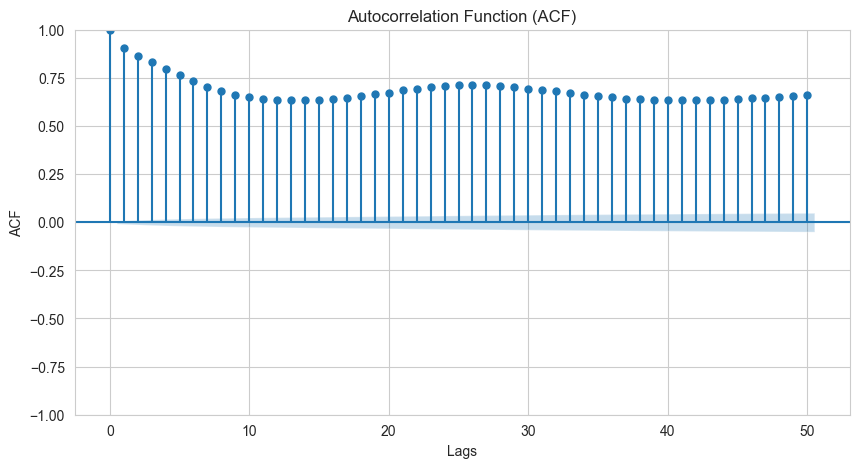

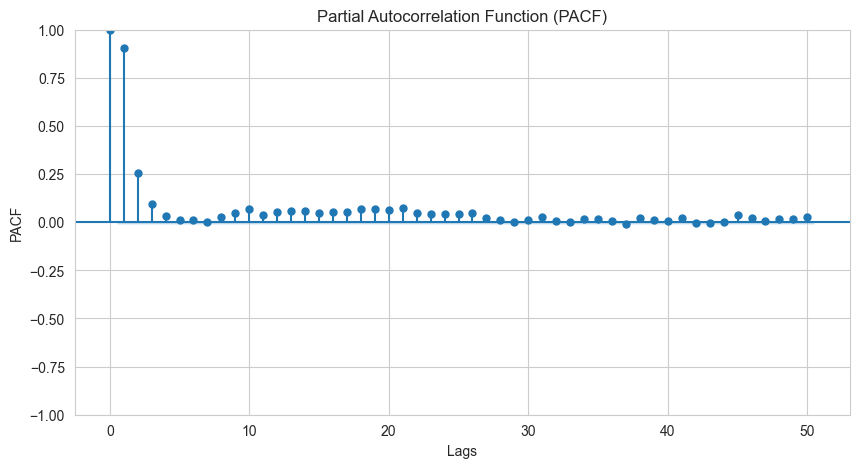

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(time_series_data, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(time_series_data, lags=50, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

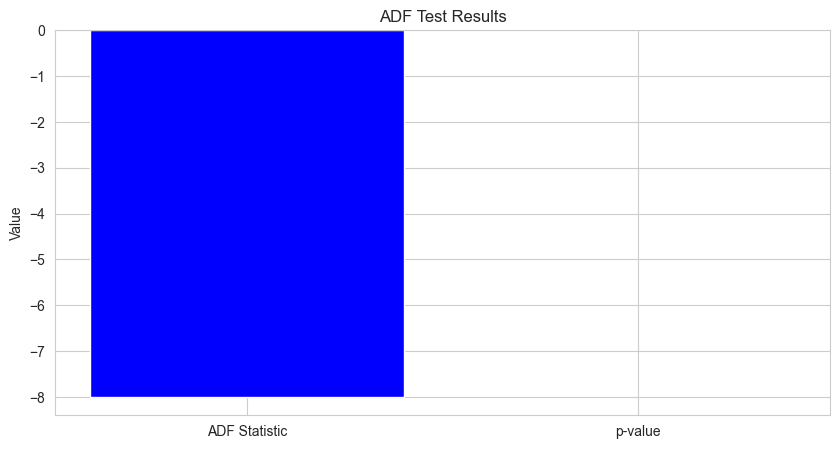

ADF Statistic: -7.999759024543343
p-value: 2.3511572436168886e-12


In [ ]:
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt

# Perform the ADF test
adf_result = adfuller(time_series_data)

# Extract the test statistic and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

# Plot the ADF test results
plt.figure(figsize=(10, 5))
plt.bar(['ADF Statistic', 'p-value'], [adf_statistic, p_value], color=['blue', 'orange'])
plt.title('ADF Test Results')
plt.ylabel('Value')
plt.show()

# Print the test results
print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")

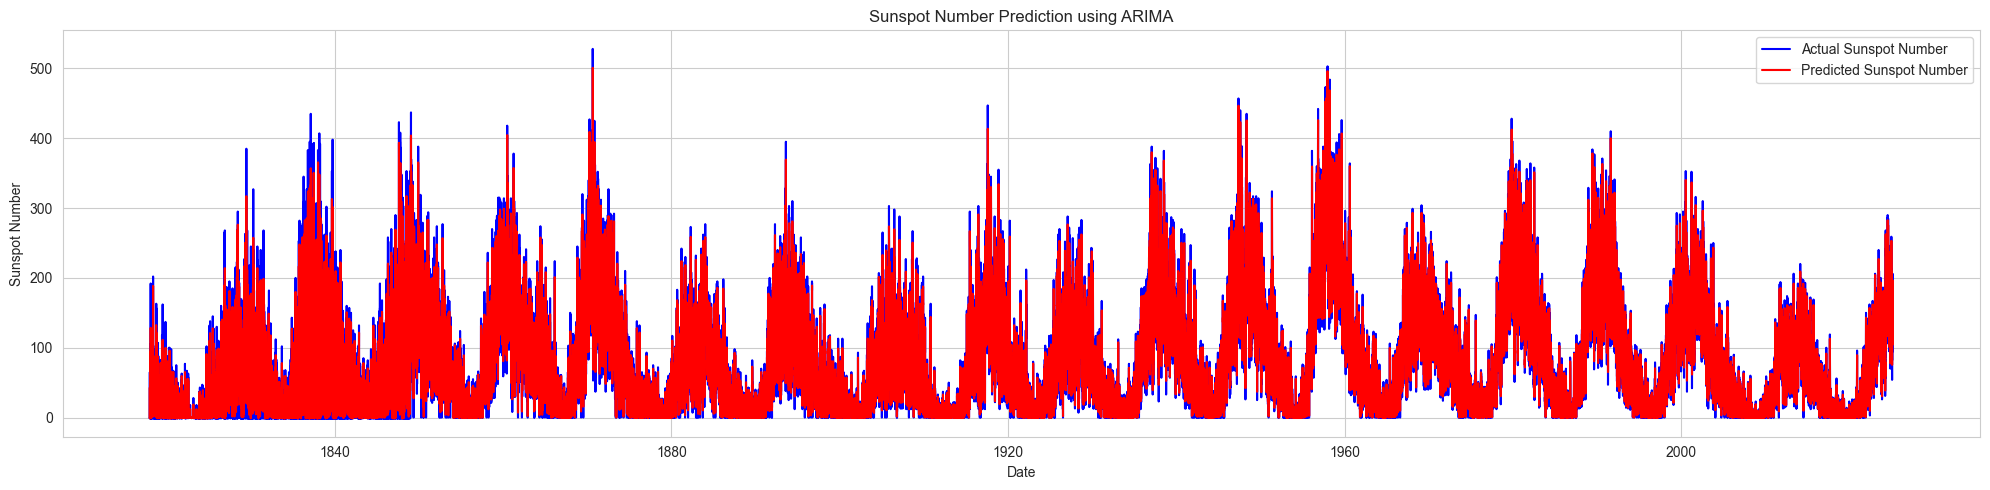

In [ ]:
# Define the ARIMA model
model_arima = ARIMA(time_series_data, order=(5, 1, 0))

# Fit the ARIMA model
model_arima_fit = model_arima.fit()

# Make predictions
predictions_arima = model_arima_fit.predict(start=1, end=len(time_series_data))

# Plot the actual and predicted values
plt.figure(figsize=(20, 5))

# Plot actual values
plt.plot(df['Date'], time_series_data, label='Actual Sunspot Number', color='blue')

# Plot predicted values
plt.plot(df['Date'], predictions_arima, label='Predicted Sunspot Number', color='red')

# Set plot title and labels
plt.title('Sunspot Number Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')

# Add legend
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Print the ARIMA model summary
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Number of Sunspots   No. Observations:                75665
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -369335.954
Date:                Wed, 09 Apr 2025   AIC                         738683.908
Time:                        19:32:06   BIC                         738739.312
Sample:                             0   HQIC                        738700.935
                              - 75665                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3336      0.002   -211.515      0.000      -0.337      -0.330
ar.L2         -0.1427      0.002    -82.068      0.000      -0.146      -0.139
ar.L3         -0.0706      0.002    -40.355      0.000      -0.074      -0.067
ar.L4         -0.0433      0.002    -26.163      0.000      -0.047      -0.040
ar.L5         -0.0334      0.001    -23.672      0.000      -0.036      -0.031
sigma2      1017.1044      2.044    497.687      0.000    1013.099    1021.110
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):           1137497.70
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

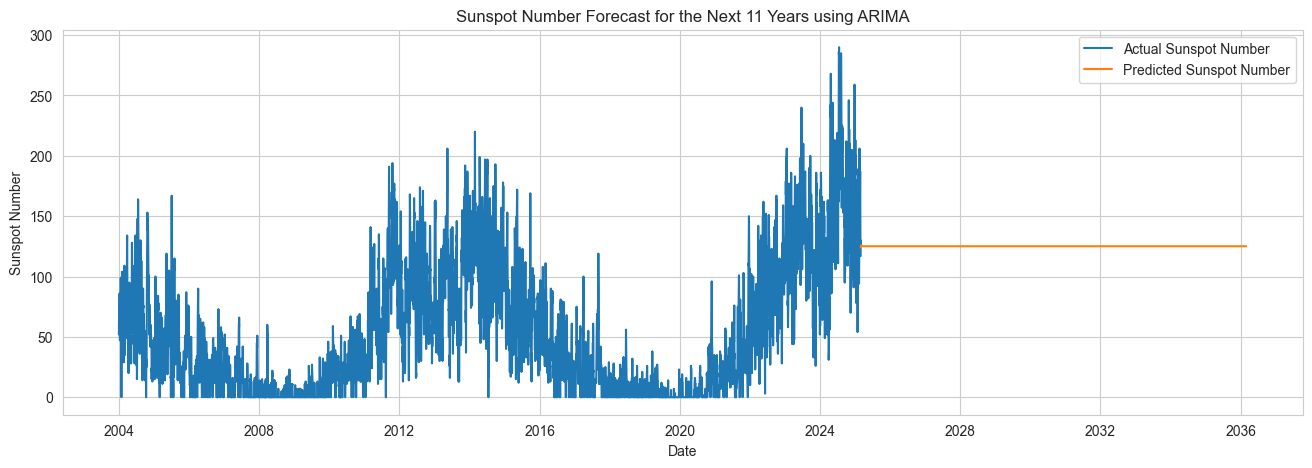

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming time_series_data and model_arima_fit are already defined from previous cells

# Forecast for the next 11 years (4017 days)
forecast_period_arima = 4017
forecast_arima_11_years = model_arima_fit.forecast(steps=forecast_period_arima)

# Create a date range for the future predictions
last_date = df['Date'].iloc[-1]
future_dates_arima_11_years = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_period_arima)

# Filter the original data to include only dates from 2004 onwards
filtered_df_arima = df[df['Date'] >= '2004-01-01']

# Create the DataFrame for future predictions
future_df_arima_11_years = pd.DataFrame(
	{'Predicted Sunspot Number': forecast_arima_11_years.values},
	index=future_dates_arima_11_years
)

# Plot the future forecast using seaborn
plt.figure(figsize=(16, 5))
sns.lineplot(x=filtered_df_arima['Date'], y=filtered_df_arima['Number of Sunspots'], label='Actual Sunspot Number')
sns.lineplot(x=future_df_arima_11_years.index, y=future_df_arima_11_years['Predicted Sunspot Number'], label='Predicted Sunspot Number')
plt.title('Sunspot Number Forecast for the Next 11 Years using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

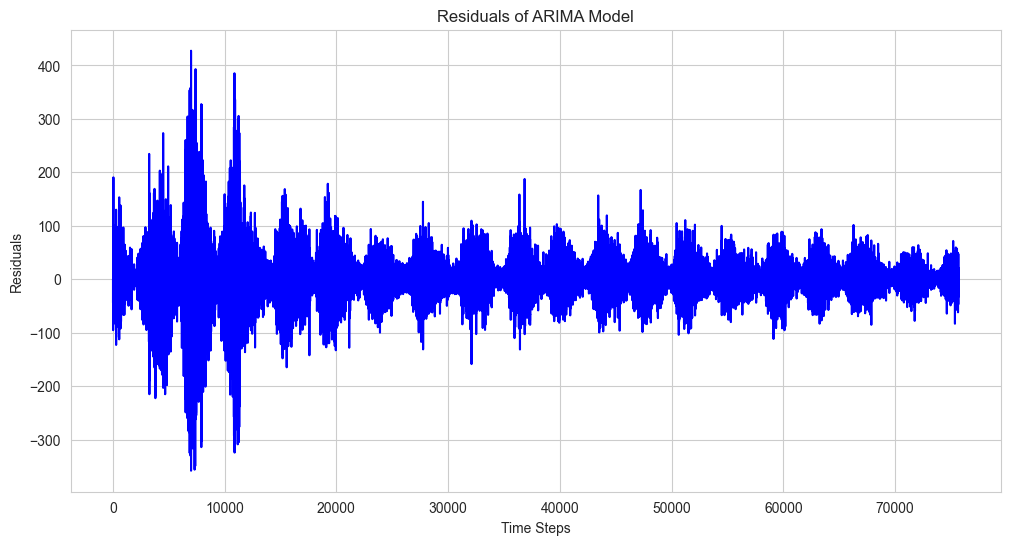

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Define residuals using the ARIMA model's residuals
residuals = model_arima_fit.resid

# If adjusted predictions are needed, they can be defined as:
# adjusted_predictions = predictions_arima + residuals
# (Note: for ARIMA, residuals = actual - predictions, so this would equal the actual values.)

# Plotting the residuals of ARIMA model
plt.figure(figsize=(12, 6))
plt.plot(residuals, color='blue')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure predictions_arima has the same length as time_series_data[1:]
predictions_arima = predictions_arima[:len(time_series_data[1:])]

# Calculate Mean Absolute Error (MAE)
mae_arima = mean_absolute_error(time_series_data[1:], predictions_arima)
print(f"Mean Absolute Error (MAE) for ARIMA: {mae_arima}")

# Calculate Mean Squared Error (MSE)
mse_arima = mean_squared_error(time_series_data[1:], predictions_arima)
print(f"Mean Squared Error (MSE) for ARIMA: {mse_arima}")

# Calculate Root Mean Squared Error (RMSE)
rmse_arima = np.sqrt(mse_arima)
print(f"Root Mean Squared Error (RMSE) for ARIMA: {rmse_arima}")

# Calculate R-Squared
r2_arima = r2_score(time_series_data[1:], predictions_arima)
print(f"R-Squared for ARIMA: {r2_arima}")

# Calculate Mean Absolute Scaled Error (MASE)
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    n = len(y_true)
    d = np.abs(np.diff(y_train)).sum() / (len(y_train) - 1)
    errors = np.abs(y_true - y_pred)
    return errors.mean() / d

mase_arima = mean_absolute_scaled_error(time_series_data[1:], predictions_arima, time_series_data[:train_size])
print(f"Mean Absolute Scaled Error (MASE) for ARIMA: {mase_arima}")

Mean Absolute Error (MAE) for ARIMA: 18.497820112894498
Mean Squared Error (MSE) for ARIMA: 1017.0372318110539
Root Mean Squared Error (RMSE) for ARIMA: 31.89102117855516
R-Squared for ARIMA: 0.8294098605954663
Mean Absolute Scaled Error (MASE) for ARIMA: 0.9583657797572741


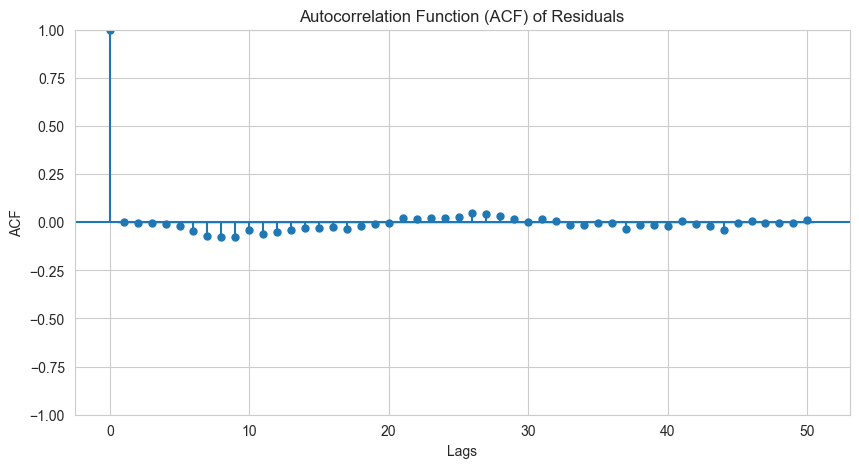

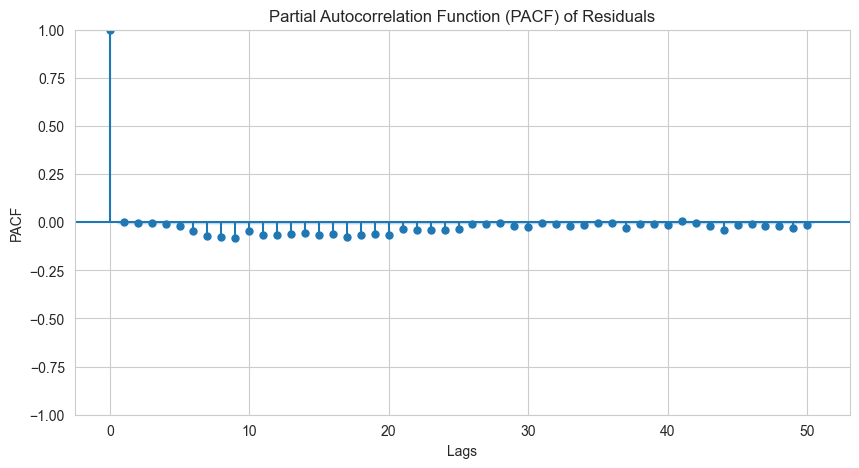

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF of residuals
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF of residuals
plt.figure(figsize=(10, 5))
plot_pacf(residuals, lags=50, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

In [ ]:
# Using SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
model_sarima = SARIMAX(time_series_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit()

# Model Summary
model_sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                   Number of Sunspots   No. Observations:                75665
Model:             SARIMAX(5, 1, 0)x(1, 1, [1], 12)   Log Likelihood             -369220.066
Date:                              Wed, 09 Apr 2025   AIC                         738456.133
Time:                                      19:37:33   BIC                         738530.004
Sample:                                           0   HQIC                        738478.836
                                            - 75665                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3389      0.002   -215.476      0.000      -0.342      -0.336
ar.L2         -0.1480      0.002    -85.348      0.000      -0.151      -0.145
ar.L3         -0.0781      0.002    -44.482      0.000      -0.082      -0.075
ar.L4         -0.0507      0.002    -30.554      0.000      -0.054      -0.047
ar.L5         -0.0401      0.001    -28.491      0.000      -0.043      -0.037
ar.S.L12      -0.0544      0.001    -36.439      0.000      -0.057      -0.051
ma.S.L12      -0.9997      0.000  -3166.025      0.000      -1.000      -0.999
sigma2      1014.2120      2.056    493.372      0.000    1010.183    1018.241
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):           1128239.57
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

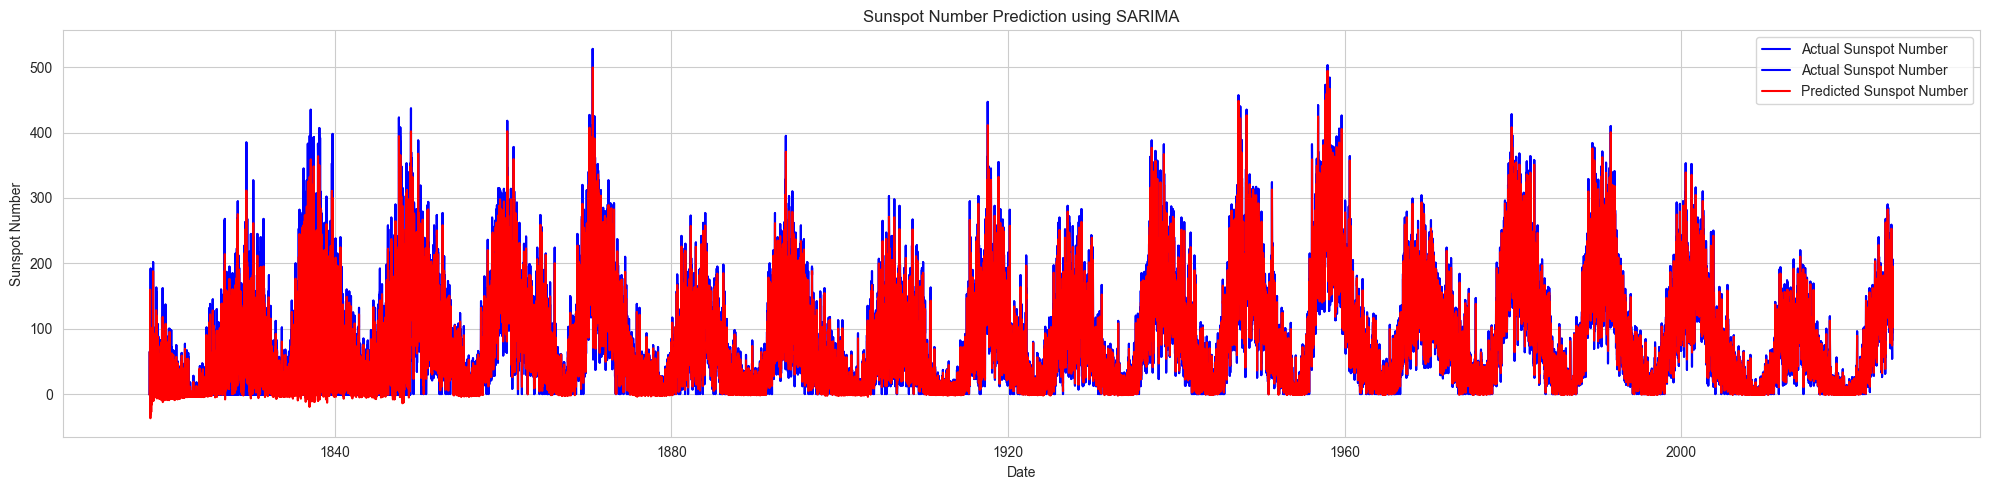

In [ ]:
# Make predictions
predictions_sarima = model_sarima_fit.predict(start=1, end=len(time_series_data))

# Plot the actual and predicted values
plt.figure(figsize=(20, 5))

# Plot actual values based on 2004 and onwards
plt.plot(df['Date'], time_series_data, label='Actual Sunspot Number', color='blue')
plt.plot(df['Date'], time_series_data, label='Actual Sunspot Number', color='blue')

# Plot predicted values
plt.plot(df['Date'], predictions_sarima, label='Predicted Sunspot Number', color='red')

# Set plot title and labels
plt.title('Sunspot Number Prediction using SARIMA')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')

# Add legend
plt.legend()
plt.tight_layout()
plt.show()

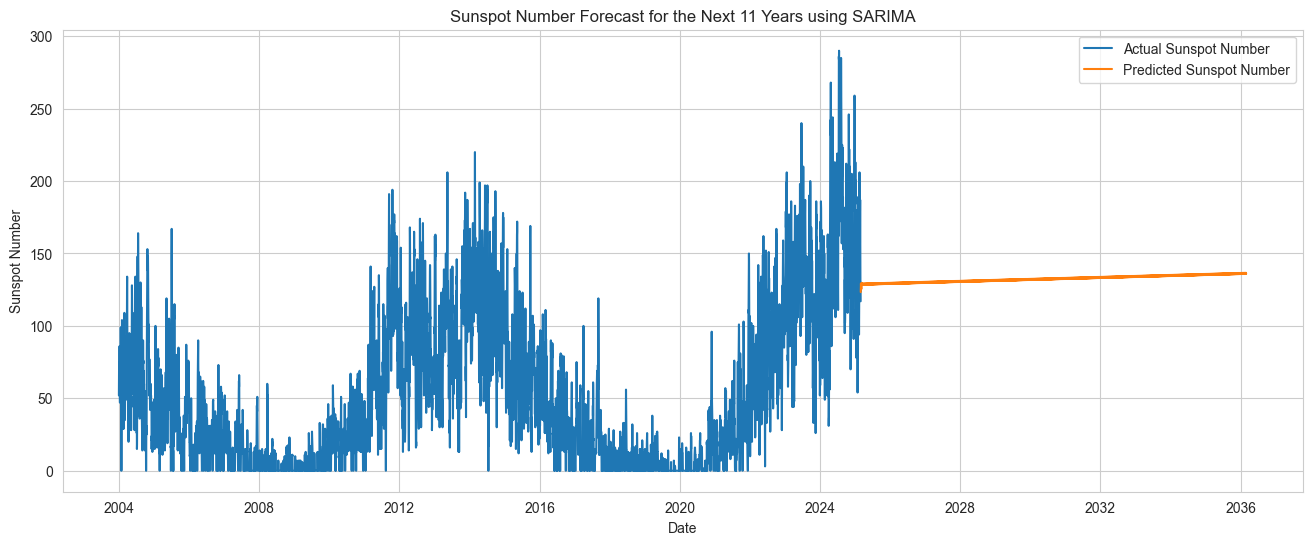

In [ ]:
# Forecasting future values using SARIMA with get_forecast
forecast_period = 4017  # 11 years (assuming daily data)

# Use get_forecast to obtain predicted_mean and confidence intervals
forecast_obj = model_sarima_fit.get_forecast(steps=forecast_period)
forecast_sarima = forecast_obj.predicted_mean

# Create a date range for the future predictions starting one day after the last date
last_date = df['Date'].iloc[-1]
future_dates_sarima = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_period)

# Create a DataFrame for the future predictions
future_df_sarima = pd.DataFrame({'Predicted Sunspot Number': forecast_sarima.values}, index=future_dates_sarima)

# Plot the actual data and the SARIMA forecast
# Define filtered_df if not already defined
filtered_df = df[df['Date'] >= '2004-01-01']

plt.figure(figsize=(16, 6))
sns.lineplot(data=filtered_df, x='Date', y='Number of Sunspots', label='Actual Sunspot Number')
sns.lineplot(x=future_df_sarima.index, y=future_df_sarima['Predicted Sunspot Number'], label='Predicted Sunspot Number')
plt.title('Sunspot Number Forecast for the Next 11 Years using SARIMA')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

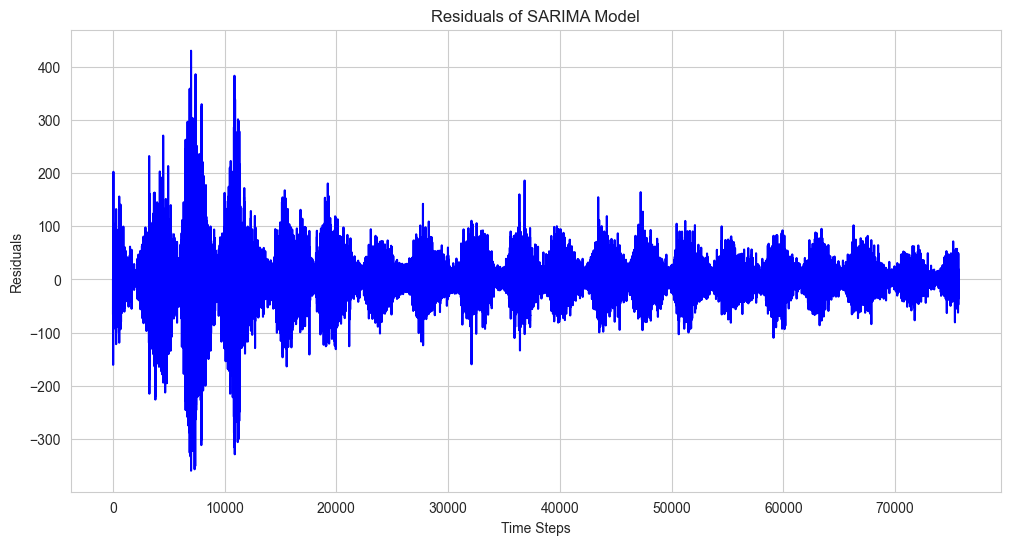

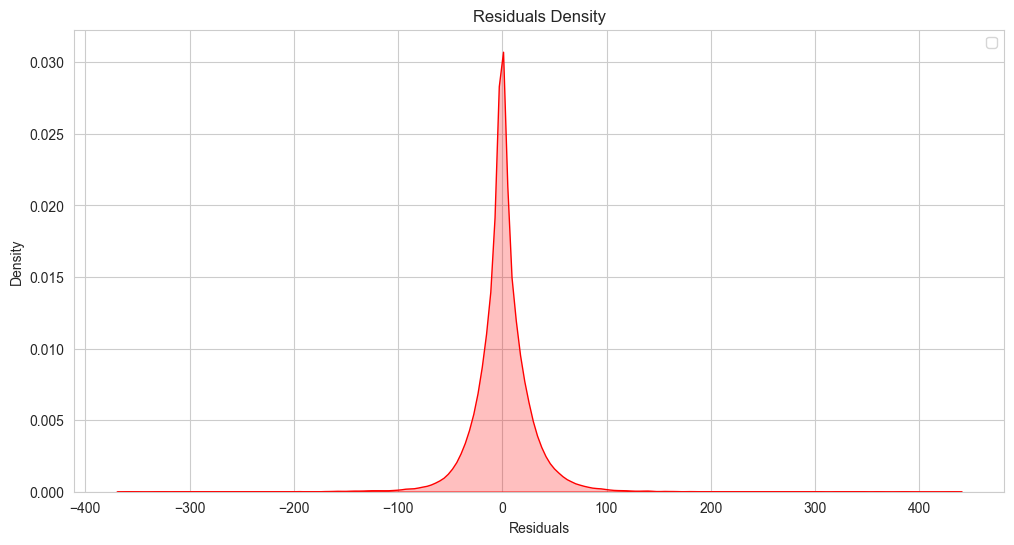

In [ ]:
# Calculate the residuals of SARIMA model
residuals_sarima = time_series_data - predictions_sarima

# Plotting the residuals of SARIMA model
plt.figure(figsize=(12, 6))
plt.plot(model_sarima_fit.resid, color='blue')
plt.title('Residuals of SARIMA Model')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.show()

# Plotting the residuals density
plt.figure(figsize=(12, 6))
sns.kdeplot(residuals_sarima, color='red', shade=True)
plt.title('Residuals Density')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# Calculate Mean Absolute Error (MAE) for SARIMA
mae_sarima = mean_absolute_error(time_series_data, predictions_sarima)
print(f"Mean Absolute Error (MAE) for SARIMA: {mae_sarima}")
# Calculate Mean Squared Error (MSE) for SARIMA
mse_sarima = mean_squared_error(time_series_data, predictions_sarima)
print(f"Mean Squared Error (MSE) for SARIMA: {mse_sarima}")
# Calculate Root Mean Squared Error (RMSE) for SARIMA
rmse_sarima = np.sqrt(mse_sarima)
print(f"Root Mean Squared Error (RMSE) for SARIMA: {rmse_sarima}")
# Calculate R-Squared for SARIMA
r2_sarima = r2_score(time_series_data, predictions_sarima)
print(f"R-Squared for SARIMA: {r2_sarima}")
# Calculate Mean Absolute Scaled Error (MASE) for SARIMA
mase_sarima = mean_absolute_scaled_error(time_series_data, predictions_sarima, time_series_data[:train_size])
print(f"Mean Absolute Scaled Error (MASE) for SARIMA: {mase_sarima}")
# Calculate Explained Variance Score for SARIMA
evs_sarima = explained_variance_score(time_series_data, predictions_sarima)
print(f"Explained Variance Score for SARIMA: {evs_sarima}")

Mean Absolute Error (MAE) for SARIMA: 6.735659227598636
Mean Squared Error (MSE) for SARIMA: 121.65317066330479
Root Mean Squared Error (RMSE) for SARIMA: 11.029649616524761
R-Squared for SARIMA: 0.9795948382322902
Mean Absolute Scaled Error (MASE) for SARIMA: 0.964503987225999
Explained Variance Score for SARIMA: 0.9795948466776292


In [ ]:
# Now perform Arch and Garch models
from arch import arch_model

# Define the GARCH model
model_garch = arch_model(time_series_data, vol='Garch', p=1, q=1)

# Fit the GARCH model
model_garch_fit = model_garch.fit()

# Model Summary
model_garch_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 25595922.990727257
Iteration:      2,   Func. Count:     12,   Neg. LLF: 537267.475266647
Iteration:      3,   Func. Count:     19,   Neg. LLF: 426241.31496394606
Iteration:      4,   Func. Count:     25,   Neg. LLF: 471187.4518613293
Iteration:      5,   Func. Count:     31,   Neg. LLF: 404336.81555881316
Iteration:      6,   Func. Count:     37,   Neg. LLF: 402987.6946555791
Iteration:      7,   Func. Count:     43,   Neg. LLF: 402404.50666081085
Iteration:      8,   Func. Count:     48,   Neg. LLF: 405304.75697563565
Iteration:      9,   Func. Count:     54,   Neg. LLF: 402256.8302398443
Iteration:     10,   Func. Count:     59,   Neg. LLF: 402245.65952624165
Iteration:     11,   Func. Count:     64,   Neg. LLF: 402245.59456059645
Iteration:     12,   Func. Count:     69,   Neg. LLF: 402245.59256447636
Iteration:     13,   Func. Count:     74,   Neg. LLF: 402245.5925217739
Iteration:     14,   Func. Count:     79,   Neg. LLF: 402

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:     Number of Sunspots   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -402246.
Distribution:                  Normal   AIC:                           804499.
Method:            Maximum Likelihood   BIC:                           804536.
                                        No. Observations:                75665
Date:                Wed, Apr 09 2025   Df Residuals:                    75664
Time:                        19:39:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            27.9439      0.970     28.817 1.306e-182 [ 26.043, 29.844]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         90.3005      7.572     11.925  8.743e-33 [ 75.459,1.051e+02]
alpha[1]       0.6101  1.574e-02     38.767      0.000   [  0.579,  0.641]
beta[1]        0.3899  1.797e-02     21.697 2.205e-104   [  0.355,  0.425]
==========================================================================

Covariance estimator: robust
"""

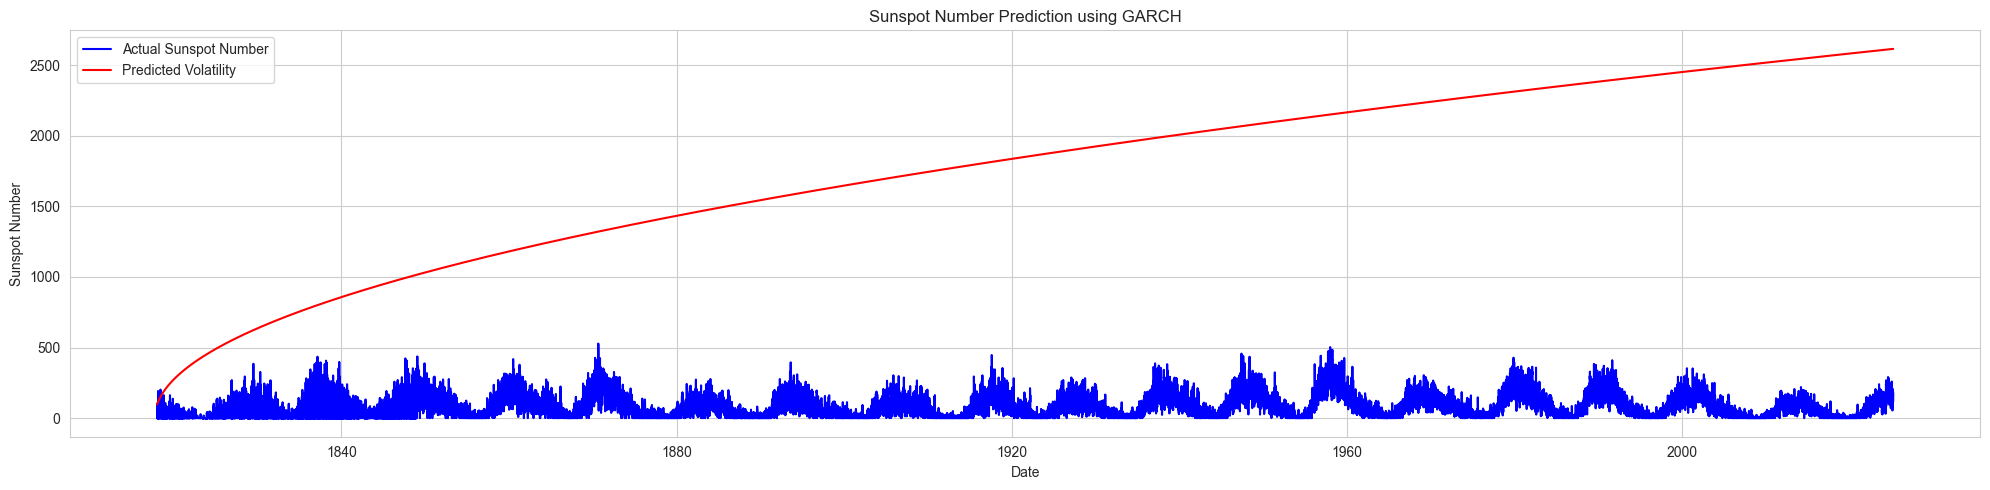

In [ ]:
# Make predictions
predictions_garch = model_garch_fit.forecast(horizon=len(time_series_data))

# Extract the forecasted volatility
forecasted_volatility = np.sqrt(predictions_garch.variance.values[-1, :])

# Plot the actual and predicted values
plt.figure(figsize=(20, 5))

# Plot actual values
plt.plot(df['Date'], time_series_data, label='Actual Sunspot Number', color='blue')

# Plot predicted values
plt.plot(df['Date'], forecasted_volatility, label='Predicted Volatility', color='red')

# Set plot title and labels
plt.title('Sunspot Number Prediction using GARCH')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.tight_layout()
plt.show()

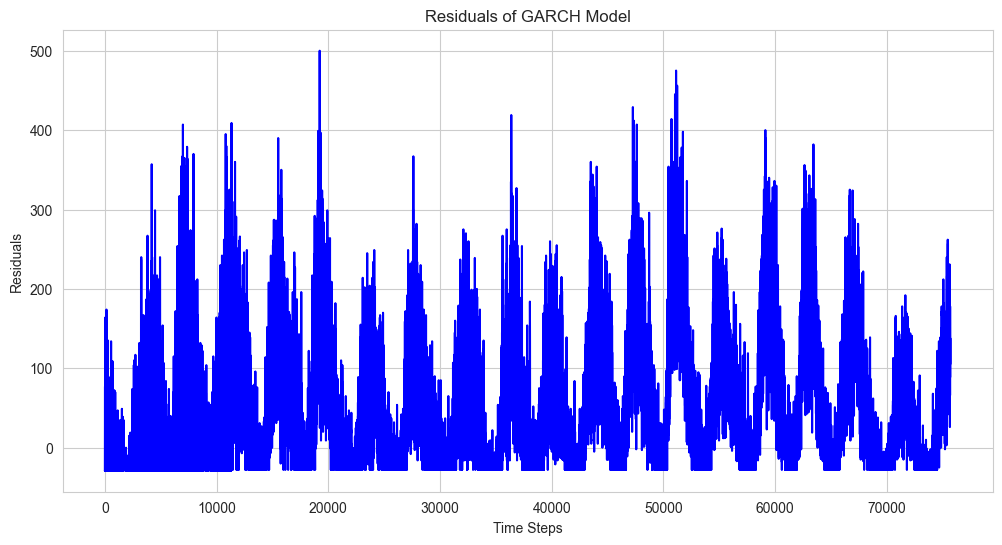

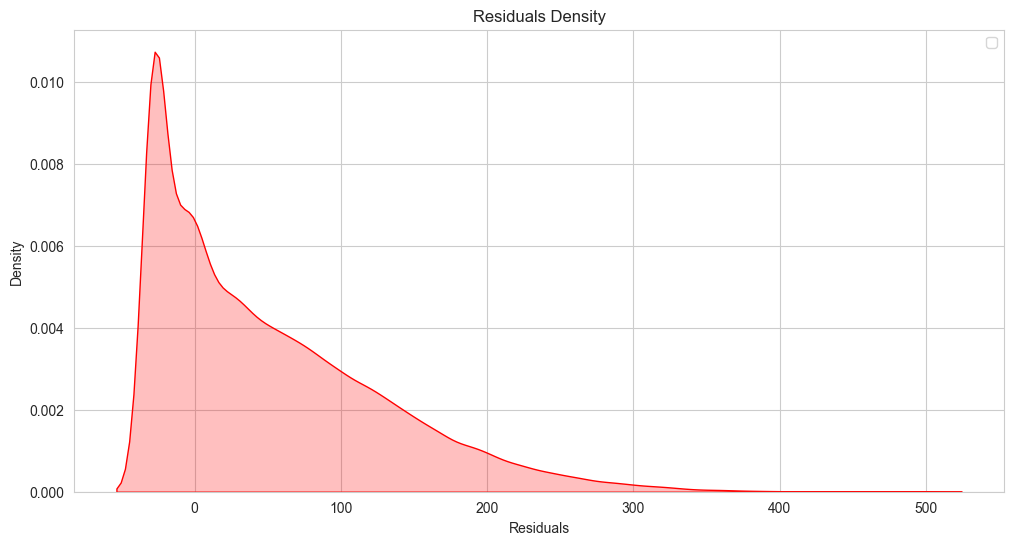

In [ ]:
# Calculate the residuals of GARCH model
residuals_garch = model_garch_fit.resid

# Plotting the residuals of GARCH model
plt.figure(figsize=(12, 6))
plt.plot(residuals_garch, color='blue')
plt.title('Residuals of GARCH Model')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.show()

# Plotting the residuals density
plt.figure(figsize=(12, 6))
sns.kdeplot(residuals_garch, color='red', shade=True)
plt.title('Residuals Density')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()

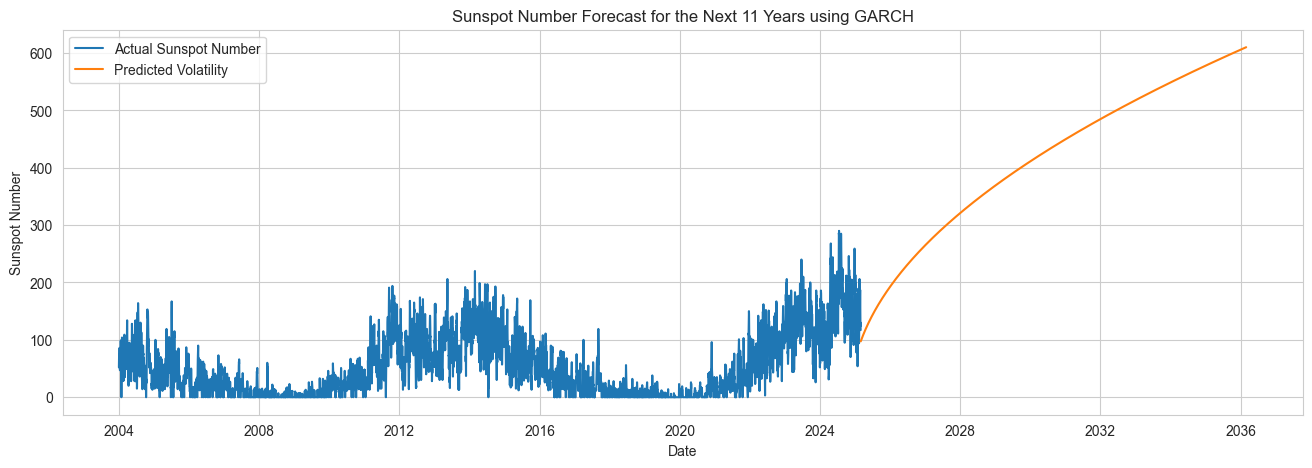

In [ ]:
# Forecasting future values using GARCH with forecast for the next 11 years
forecast_period_garch = 4017  # 11 years (assuming daily data)

# Use forecast to obtain predicted_mean and confidence intervals
forecast_garch = model_garch_fit.forecast(horizon=forecast_period_garch)

# Extract the forecasted volatility
forecasted_volatility_garch = np.sqrt(forecast_garch.variance.values[-1, :])

# Create a date range for the future predictions starting one day after the last date
last_date = df['Date'].iloc[-1]
future_dates_garch = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_period_garch)

# Create a DataFrame for the future predictions
future_df_garch = pd.DataFrame({'Predicted Volatility': forecasted_volatility_garch}, index=future_dates_garch)

# Plot the actual data and the GARCH forecast
plt.figure(figsize=(16, 5))
sns.lineplot(data=filtered_df, x='Date', y='Number of Sunspots', label='Actual Sunspot Number')
sns.lineplot(x=future_df_garch.index, y=future_df_garch['Predicted Volatility'], label='Predicted Volatility')
plt.title('Sunspot Number Forecast for the Next 11 Years using GARCH')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

In [ ]:
# Calculate Mean Absolute Error (MAE) for GARCH
mae_garch = mean_absolute_error(time_series_data, forecasted_volatility)

# Calculate Mean Squared Error (MSE) for GARCH
mse_garch = mean_squared_error(time_series_data, forecasted_volatility)

# Calculate Root Mean Squared Error (RMSE) for GARCH
rmse_garch = np.sqrt(mse_garch)

# Calculate R-Squared for GARCH
r2_garch = r2_score(time_series_data, forecasted_volatility)

# Calculate Mean Absolute Scaled Error (MASE) for GARCH
mase_garch = mean_absolute_scaled_error(time_series_data, forecasted_volatility, time_series_data[:train_size])

# Calculate Explained Variance Score for GARCH
evs_garch = explained_variance_score(time_series_data, forecasted_volatility)

# Print the evaluation metrics for GARCH
print('Evaluation Metrics for GARCH Model')
print('---------------------------------------------------')
print(f'Mean Absolute Error (MAE) for GARCH: {mae_garch}')
print(f'Mean Squared Error (MSE) for GARCH: {mse_garch}')
print(f'Root Mean Squared Error (RMSE) for GARCH: {rmse_garch}')
print(f'R-Squared for GARCH: {r2_garch}')
print(f'Mean Absolute Scaled Error (MASE) for GARCH: {mase_garch}')
print(f'Explained Variance Score for GARCH: {evs_garch}')

Evaluation Metrics for GARCH Model
---------------------------------------------------
Mean Absolute Error (MAE) for GARCH: 1666.8778766528526
Mean Squared Error (MSE) for GARCH: 3147466.7802479886
Root Mean Squared Error (RMSE) for GARCH: 1774.1101375754517
R-Squared for GARCH: -526.931729680971
Mean Absolute Scaled Error (MASE) for GARCH: 86.36037685894603
Explained Variance Score for GARCH: -60.893484516171995


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Prepare the data for Holt-Winters
# Use the 'Number of Sunspots' column as the time series data
time_series_data_hw = filtered_df['Number of Sunspots']

# Split the data into train and test sets
train_size_hw = int(len(time_series_data_hw) * 0.8)
train_data_hw = time_series_data_hw[:train_size_hw]
test_data_hw = time_series_data_hw[train_size_hw:]

# Fit the Holt-Winters model
hw_model = ExponentialSmoothing(train_data_hw, seasonal='add', seasonal_periods=12).fit()

# Model Summary
hw_model.summary()

Dep. Variable:,Number of Sunspots,No. Observations:,6184
Model:,ExponentialSmoothing,SSE,796796.847
Optimized:,True,AIC,30073.795
Trend:,None,BIC,30168.011
Seasonal:,Additive,AICC,30073.884
Seasonal Periods:,12,Date:,"Wed, 09 Apr 2025"
Box-Cox:,False,Time:,19:39:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9722478,alpha,True
smoothing_seasonal,0.0269564,gamma,True


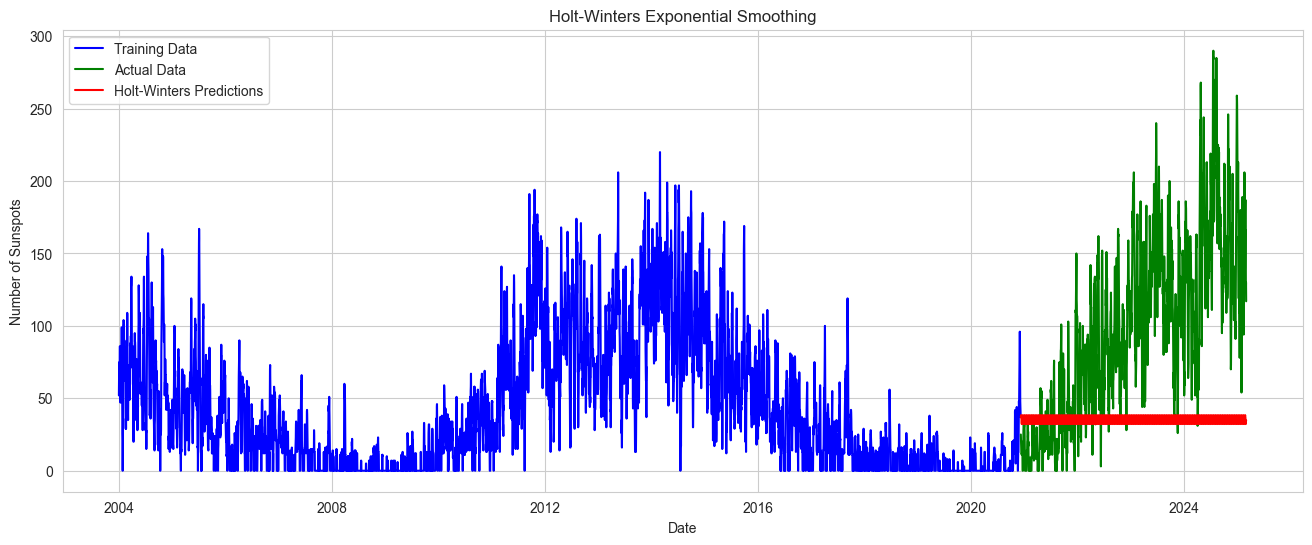

In [ ]:
# Make predictions
hw_predictions = hw_model.forecast(len(test_data_hw))

# Plot the actual and predicted values
plt.figure(figsize=(16, 6))
plt.plot(filtered_df['Date'][:train_size_hw], train_data_hw, label='Training Data', color='blue')
plt.plot(filtered_df['Date'][train_size_hw:], test_data_hw, label='Actual Data', color='green')
plt.plot(filtered_df['Date'][train_size_hw:], hw_predictions, label='Holt-Winters Predictions', color='red')
plt.title('Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()

In [ ]:
# Calculate Mean Absolute Error (MAE) for Holt-Winters
mae_hw = mean_absolute_error(test_data_hw, hw_predictions)

# Calculate Mean Squared Error (MSE) for Holt-Winters
mse_hw = mean_squared_error(test_data_hw, hw_predictions)

# Calculate Root Mean Squared Error (RMSE) for Holt-Winters
rmse_hw = np.sqrt(mse_hw)

# Calculate R-Squared for Holt-Winters
r2_hw = r2_score(test_data_hw, hw_predictions)

# Calculate Explained Variance Score for Holt-Winters
evs_hw = explained_variance_score(test_data_hw, hw_predictions)

# Print the evaluation metrics for Holt-Winters
print('Evaluation Metrics for Holt-Winters Model')
print('---------------------------------------------------')
print(f'Mean Absolute Error (MAE) for Holt-Winters: {mae_hw}')
print(f'Mean Squared Error (MSE) for Holt-Winters: {mse_hw}')
print(f'Root Mean Squared Error (RMSE) for Holt-Winters: {rmse_hw}')
print(f'R-Squared for Holt-Winters: {r2_hw}')
print(f'Explained Variance Score for Holt-Winters: {evs_hw}')

Evaluation Metrics for Holt-Winters Model
---------------------------------------------------
Mean Absolute Error (MAE) for Holt-Winters: 70.69927756145194
Mean Squared Error (MSE) for Holt-Winters: 7798.1983670792815
Root Mean Squared Error (RMSE) for Holt-Winters: 88.30740833632976
R-Squared for Holt-Winters: -1.036169391479394
Explained Variance Score for Holt-Winters: -0.0006705275326364113


Write a code using SARIMA as it is best model for this dataset to tackle the main issue is that you are seeing any long-term patterns because you are simply predicting the next day's activity. Sunspot cycles are 11 years - to see any hint of that, you need to be predicting the activity in a year or five years, not the next day. If you really do want to be focusing on the next day's activity, try using the day before as the baseline to compare your models against.

In [96]:
df.head()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator,Date
0,1818,1,1,1818.001,-1,-1.0,0,1,1818-01-01
1,1818,1,2,1818.004,-1,-1.0,0,1,1818-01-02
2,1818,1,3,1818.007,-1,-1.0,0,1,1818-01-03
3,1818,1,4,1818.010,-1,-1.0,0,1,1818-01-04
4,1818,1,5,1818.012,-1,-1.0,0,1,1818-01-05


In [ ]:
df['Date'] = pd.to_datetime(
    dict(year=df['Year'], month=df['Month'], day=df['Day'])
)

# Set the Date column as index
df = df.reset_index(drop=True)

# Display the first few rows of the dataframe
df.head()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,1818,1,4,1818.010,-1,-1.0,0,1
1,1818,1,5,1818.012,-1,-1.0,0,1
2,1818,1,6,1818.015,-1,-1.0,0,1
3,1818,1,7,1818.018,-1,-1.0,0,1
4,1818,1,8,1818.021,65,10.2,1,1


In [99]:
# Load and preprocess data (assuming df has 'Date' and 'Sunspot Number')
time_series_data = df['Number of Sunspots']

# Split into training and test sets (e.g., last 365 days for testing)
test_size = 365  # 1 year of daily data
train_data = time_series_data.iloc[:-test_size]
test_data = time_series_data.iloc[-test_size:]

In [100]:
# --- Baseline Model: "Previous Day" Predictions ---
# Shift the data by 1 day to use yesterday's value as today's prediction
baseline_predictions = time_series_data.shift(1).iloc[-test_size:]

# --- SARIMA Model for Next-Day Predictions ---
# Fit SARIMA on training data (adjust order if needed)
model_sarima = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit(disp=False)

# Forecast the test period
sarima_forecast = model_sarima_fit.get_forecast(steps=test_size).predicted_mean

# --- Evaluation ---
# Calculate metrics for baseline and SARIMA
mae_baseline = mean_absolute_error(test_data, baseline_predictions)
mse_baseline = mean_squared_error(test_data, baseline_predictions)
rmse_baseline = np.sqrt(mse_baseline)

mae_sarima = mean_absolute_error(test_data, sarima_forecast)
mse_sarima = mean_squared_error(test_data, sarima_forecast)
rmse_sarima = np.sqrt(mse_sarima)

print(f"Baseline MAE: {mae_baseline:.2f}, SARIMA MAE: {mae_sarima:.2f}")
print(f"Baseline RMSE: {rmse_baseline:.2f}, SARIMA RMSE: {rmse_sarima:.2f}")

Baseline MAE: 15.93, SARIMA MAE: 47.91
Baseline RMSE: 20.21, SARIMA RMSE: 60.11


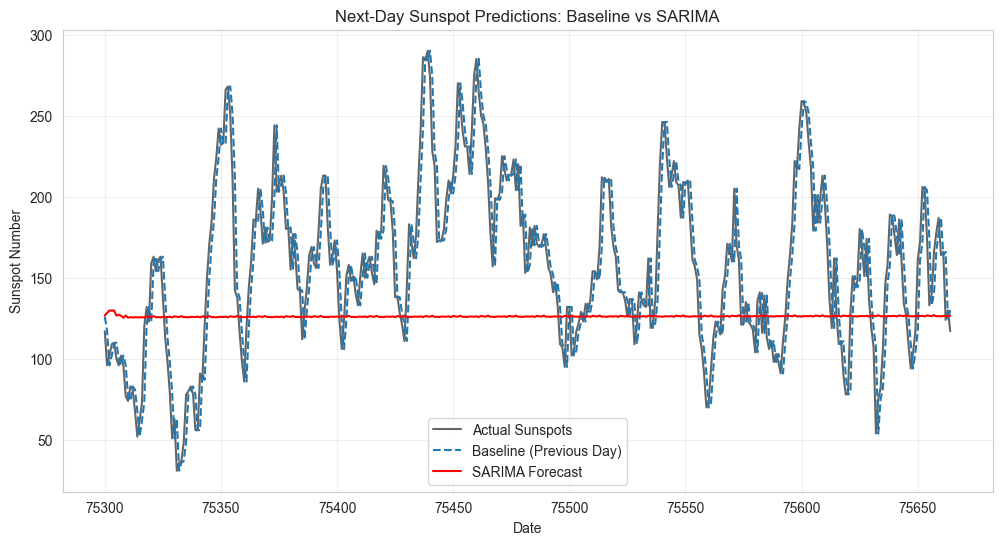

In [101]:
# --- Visualization ---
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Sunspots', color='black', alpha=0.6)
plt.plot(test_data.index, baseline_predictions, label='Baseline (Previous Day)', linestyle='--')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('Next-Day Sunspot Predictions: Baseline vs SARIMA')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [104]:
# Perform Baseline Model: "Previous Day" Predictions using the last five years of data along with SARIMA
# Load and preprocess data (assuming df has 'Date' and 'Sunspot Number')
time_series_data = df['Number of Sunspots']

# Split into training and test sets (e.g., last 5 years for testing)
test_size = 5 * 365  # 5 years of daily data
train_data = time_series_data.iloc[:-test_size]
test_data = time_series_data.iloc[-test_size:]

# --- Baseline Model: "Previous Day" Predictions ---
# Shift the data by 1 day to use yesterday's value as today's prediction
baseline_predictions = time_series_data.shift(1).iloc[-test_size:]

# --- SARIMA Model for Next-Day Predictions ---
# Fit SARIMA on training data (adjust order if needed)
model_sarima = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit(disp=False)

# Forecast the test period
sarima_forecast = model_sarima_fit.get_forecast(steps=test_size).predicted_mean

# --- Evaluation ---
# Calculate metrics for baseline and SARIMA
mae_baseline = mean_absolute_error(test_data, baseline_predictions)
mse_baseline = mean_squared_error(test_data, baseline_predictions)
rmse_baseline = np.sqrt(mse_baseline)

mae_sarima = mean_absolute_error(test_data, sarima_forecast)
mse_sarima = mean_squared_error(test_data, sarima_forecast)
rmse_sarima = np.sqrt(mse_sarima)

print(f"Baseline MAE: {mae_baseline:.2f}, SARIMA MAE: {mae_sarima:.2f}")
print(f"Baseline RMSE: {rmse_baseline:.2f}, SARIMA RMSE: {rmse_sarima:.2f}")

Baseline MAE: 10.51, SARIMA MAE: 86.70
Baseline RMSE: 14.69, SARIMA RMSE: 109.29


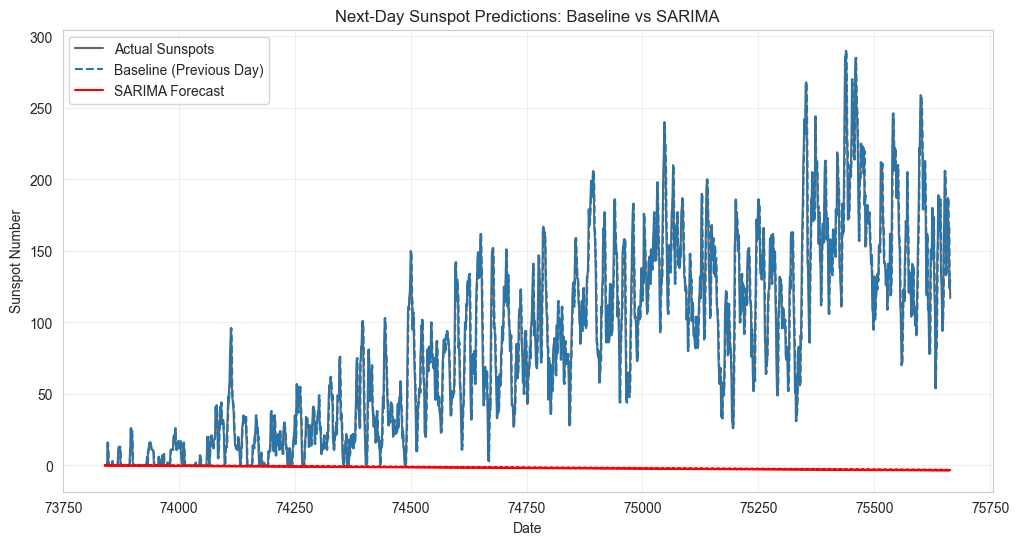

In [105]:
# --- Visualization ---
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Sunspots', color='black', alpha=0.6)
plt.plot(test_data.index, baseline_predictions, label='Baseline (Previous Day)', linestyle='--')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('Next-Day Sunspot Predictions: Baseline vs SARIMA')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

1-Year Baseline MAE: 15.93
1-Year SARIMA MAE: 47.91


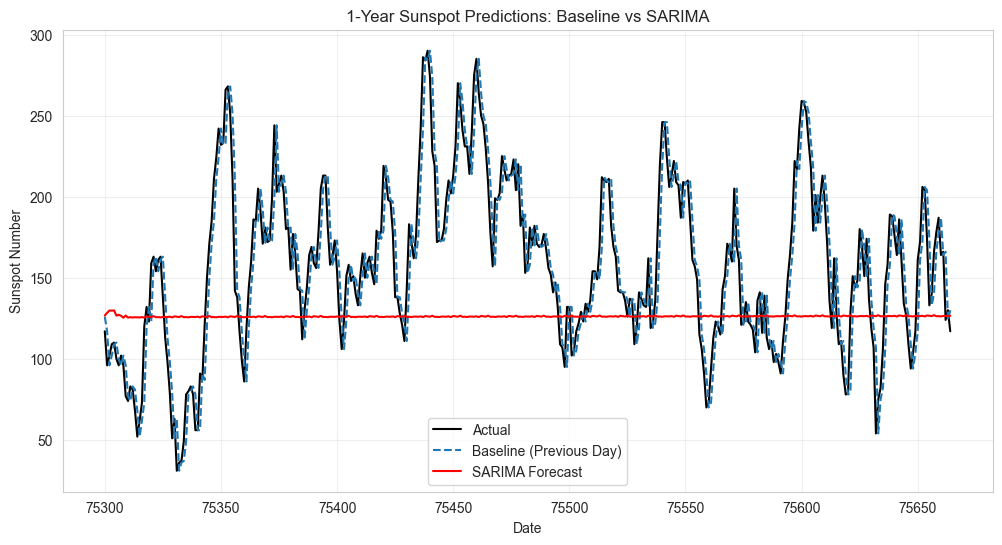

5-Year Baseline MAE: 10.51
5-Year SARIMA MAE: 86.70


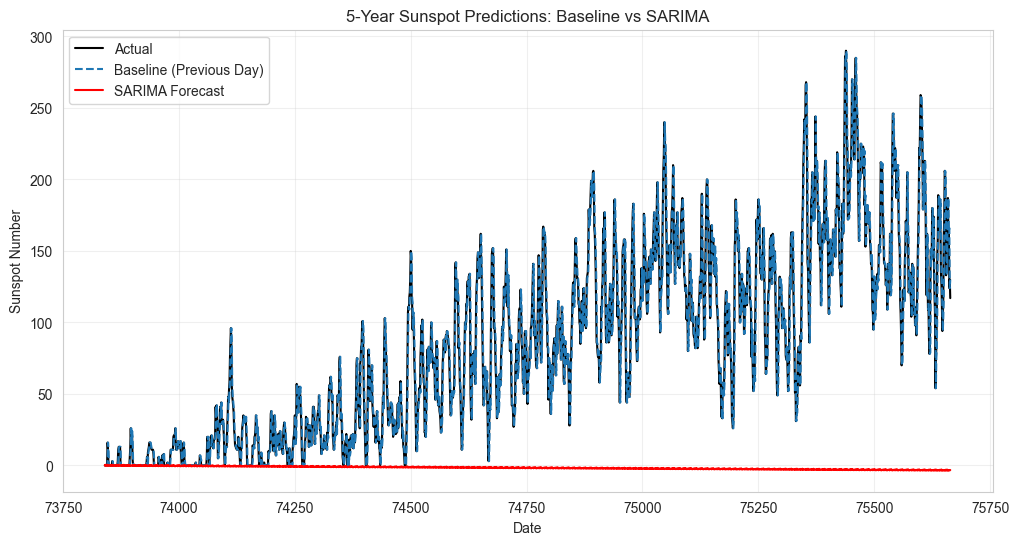

In [106]:
# Function to evaluate baseline and SARIMA for different horizons
def evaluate_forecast(test_size_years=1):
    test_size = test_size_years * 365  # Convert years to days
    train_data = time_series_data.iloc[:-test_size]
    test_data = time_series_data.iloc[-test_size:]

    # Baseline: Previous day's value
    baseline_predictions = time_series_data.shift(1).iloc[-test_size:]

    # SARIMA model (short-term configuration)
    model = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    sarima_forecast = model_fit.get_forecast(steps=test_size).predicted_mean

    # Metrics
    mae_baseline = mean_absolute_error(test_data, baseline_predictions)
    mae_sarima = mean_absolute_error(test_data, sarima_forecast)
    print(f"{test_size_years}-Year Baseline MAE: {mae_baseline:.2f}")
    print(f"{test_size_years}-Year SARIMA MAE: {mae_sarima:.2f}")

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data, label='Actual', color='black')
    plt.plot(test_data.index, baseline_predictions, linestyle='--', label='Baseline (Previous Day)')
    plt.plot(test_data.index, sarima_forecast, color='red', label='SARIMA Forecast')
    plt.title(f"{test_size_years}-Year Sunspot Predictions: Baseline vs SARIMA")
    plt.ylabel("Sunspot Number")
    plt.xlabel("Date")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Evaluate for 1-year and 5-year horizons
evaluate_forecast(test_size_years=1)
evaluate_forecast(test_size_years=5)